Richard Test Notebook


In [59]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [60]:
# get all the tables from the wikipedia page 'https://en.wikipedia.org/wiki/Nasdaq-100#Components' and write them to a pandas dataframe called WikipediaDTs
nasdaq = 'https://en.wikipedia.org/wiki/Nasdaq-100#Components'
WikipediaDTs = pd.DataFrame()
WikipediaDTs = pd.read_html(nasdaq)
len(WikipediaDTs) # this will tell us how many tables there are on the page

17

To work out which table has the names and tickers, we can simply cycle through them manually (it's like opening x-mas pressies)

In [61]:
WikipediaDTs[1] # this isn't it!

,Category,All-Time Highs[9],All-Time Highs[9].1
0,Closing,16573.34,"Friday, November 19, 2021"
1,Intraday,16764.86,"Monday, November 22, 2021"


In [62]:
WikipediaDTs[4] # here it is!

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,ADP,ADP,Industrials,Human Resource & Employment Services
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Align Technology,ALGN,Health Care,Health Care Supplies
4,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
97,"Workday, Inc.",WDAY,Information Technology,Application Software
98,Xcel Energy,XEL,Utilities,Multi-Utilities
99,Zoom Video Communications,ZM,Information Technology,Application Software


In [63]:
# now we need to get the tickers from the table and put them in a list called tickersLIST
tickersLIST = WikipediaDTs[4]['Ticker'].tolist() # this is a list
tickersLIST

['ADBE',
 'ADP',
 'ABNB',
 'ALGN',
 'GOOGL',
 'GOOG',
 'AMZN',
 'AMD',
 'AEP',
 'AMGN',
 'ADI',
 'ANSS',
 'AAPL',
 'AMAT',
 'ASML',
 'AZN',
 'TEAM',
 'ADSK',
 'BKR',
 'BIIB',
 'BKNG',
 'AVGO',
 'CDNS',
 'CHTR',
 'CTAS',
 'CSCO',
 'CTSH',
 'CMCSA',
 'CEG',
 'CPRT',
 'CSGP',
 'COST',
 'CRWD',
 'CSX',
 'DDOG',
 'DXCM',
 'FANG',
 'DLTR',
 'EBAY',
 'EA',
 'ENPH',
 'EXC',
 'FAST',
 'FTNT',
 'GEHC',
 'GILD',
 'GFS',
 'HON',
 'IDXX',
 'ILMN',
 'INTC',
 'INTU',
 'ISRG',
 'JD',
 'KDP',
 'KLAC',
 'KHC',
 'LRCX',
 'LCID',
 'LULU',
 'MAR',
 'MRVL',
 'MELI',
 'META',
 'MCHP',
 'MU',
 'MSFT',
 'MRNA',
 'MDLZ',
 'MNST',
 'NFLX',
 'NVDA',
 'NXPI',
 'ORLY',
 'ODFL',
 'ON',
 'PCAR',
 'PANW',
 'PAYX',
 'PYPL',
 'PDD',
 'PEP',
 'QCOM',
 'REGN',
 'ROST',
 'SGEN',
 'SIRI',
 'SBUX',
 'SNPS',
 'TMUS',
 'TSLA',
 'TXN',
 'TTD',
 'VRSK',
 'VRTX',
 'WBA',
 'WBD',
 'WDAY',
 'XEL',
 'ZM',
 'ZS']

# Yahoo Finance API
This is now really __cool__ - we are going to use the yahoo finance API

In [97]:
#download from yahoo finance the historical data for all tickers in the list and put it in a single dataframe called hPricesDT
hPricesDT = pd.DataFrame()
hPricesDT = yf.download(tickersLIST, start='2010-07-01', end='2021-06-30')['Adj Close']
hPricesDT

[*********************100%%**********************]  101 of 101 completed


3 Failed downloads:
['GEHC', 'CEG', 'GFS']: Exception("%ticker%: Data doesn't exist for startDate = 1277956800, endDate = 1625025600")


,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TTD,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-01,7.532462,NaN,26.660000,20.342615,25.480864,24.570000,19.424879,14.300000,9.537404,7.390000,...,NaN,16.516630,29.273926,32.299999,18.045647,18.441492,NaN,13.184090,NaN,NaN
2010-07-02,7.485780,NaN,26.730000,20.306181,25.301195,24.309999,19.527367,14.200000,9.537404,7.170000,...,NaN,16.473852,29.206066,32.220001,17.909763,18.083801,NaN,13.241632,NaN,NaN
2010-07-06,7.537012,NaN,26.340000,20.320749,25.288366,24.049999,20.051878,14.100000,9.362555,7.040000,...,NaN,16.480986,29.128523,32.169998,18.086416,18.206438,NaN,13.401483,NaN,NaN
2010-07-07,7.841362,NaN,26.790001,21.450096,25.801699,24.730000,20.721071,14.880000,9.688416,7.390000,...,NaN,17.286499,28.672939,33.040001,18.446514,18.533470,NaN,13.663630,NaN,NaN
2010-07-08,7.823782,NaN,26.850000,21.187788,25.904371,24.610001,20.962231,14.880000,9.624832,7.370000,...,NaN,17.265121,28.508148,33.799999,19.105556,18.564129,NaN,13.810691,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,131.973160,151.580002,574.229980,157.063248,186.774063,283.670013,76.298157,605.820007,132.850143,83.820000,...,65.389999,175.024612,169.230774,187.520004,46.621601,29.510000,238.690002,61.973122,376.920013,218.860001
2021-06-24,131.686920,150.729996,578.260010,160.336411,187.587234,286.959991,76.482773,617.390015,135.556168,86.099998,...,75.879997,177.385239,170.817627,191.940002,46.639503,30.320000,241.710007,62.001194,373.399994,219.639999
2021-06-25,131.390793,149.669998,579.659973,160.931519,188.811798,288.739990,78.255226,614.979980,133.526672,85.620003,...,76.019997,176.971436,172.187637,194.339996,46.693203,30.860001,243.000000,62.787205,372.470001,218.839996


In [98]:
# identify any tickers with NaN values and list them in a list called tickersNaN
tickersNaN = []
for ticker in tickersLIST:
    if hPricesDT[ticker].isnull().values.any() == True:
        tickersNaN.append(ticker)

tickersNaN

# drop the tickers with NaN values from the dataframe hPricesDT
hPricesDT.drop(tickersNaN, axis=1, inplace=True)
hPricesDT


,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SIRI,SNPS,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-01,7.532462,26.660000,20.342615,25.480864,24.570000,19.424879,14.300000,9.537404,7.390000,37.984497,...,0.816212,20.639999,13.969308,1.464000,16.516630,29.273926,32.299999,18.045647,18.441492,13.184090
2010-07-02,7.485780,26.730000,20.306181,25.301195,24.309999,19.527367,14.200000,9.537404,7.170000,37.750835,...,0.842542,20.510000,13.753885,1.280000,16.473852,29.206066,32.220001,17.909763,18.083801,13.241632
2010-07-06,7.537012,26.340000,20.320749,25.288366,24.049999,20.051878,14.100000,9.362555,7.040000,37.458752,...,0.824989,20.459999,13.803597,1.074000,16.480986,29.128523,32.169998,18.086416,18.206438,13.401483
2010-07-07,7.841362,26.790001,21.450096,25.801699,24.730000,20.721071,14.880000,9.688416,7.390000,37.531784,...,0.877648,21.480000,14.333868,1.053333,17.286499,28.672939,33.040001,18.446514,18.533470,13.663630
2010-07-08,7.823782,26.850000,21.187788,25.904371,24.610001,20.962231,14.880000,9.624832,7.370000,38.137836,...,0.886424,21.410000,14.930423,1.164000,17.265121,28.508148,33.799999,19.105556,18.564129,13.810691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,131.973160,574.229980,157.063248,186.774063,283.670013,76.298157,605.820007,132.850143,83.820000,221.818329,...,5.846913,268.859985,145.029999,218.856674,175.024612,169.230774,187.520004,46.621601,29.510000,61.973122
2021-06-24,131.686920,578.260010,160.336411,187.587234,286.959991,76.482773,617.390015,135.556168,86.099998,223.899796,...,5.958460,273.799988,145.600006,226.606674,177.385239,170.817627,191.940002,46.639503,30.320000,62.001194
2021-06-25,131.390793,579.659973,160.931519,188.811798,288.739990,78.255226,614.979980,133.526672,85.620003,225.507385,...,6.060711,268.970001,145.339996,223.956665,176.971436,172.187637,194.339996,46.693203,30.860001,62.787205


In [126]:
# set signal period and convert to timestamps
signal_start_date = '2012-07-01'
signal_start_date = pd.Timestamp(signal_start_date)
# set signgal_end_date to be 1 year after signal_start_date
signal_end_date = signal_start_date + signal_end_date.DateOffset(years=1)
print(signal_end_date)


# create a dataframe called signalDT that contains the prices for the signal period
signalDT = pd.DataFrame()
signalDT = hPricesDT[signal_start_date:+ signal_end_date.DateOffset(years=1)]

# print the last record of signalDT
print(hPricesDT[signal_start_date:signal_end_date])

# convert the prices to index values and put them in a dataframe called signalIndexDT
signalIndexDT = pd.DataFrame()
signalIndexDT = signalDT / signalDT.iloc[0]

AttributeError: 'Timestamp' object has no attribute 'DateOffset'

In [100]:
# create a list of the 5 tickers with the highest index numbers at the end of the period
top5 = []
top5 = signalIndexDT.iloc[-1].nlargest(5).index.tolist()


# create a list of the 5 tickers with the lowest index numbers at the end of the period
bottom5 = []
bottom5 = signalIndexDT.iloc[-1].nsmallest(5).index.tolist()

# create a list of the other tickers
otherTickers = []
otherTickers = signalIndexDT.columns.tolist()
for ticker in top5:
    otherTickers.remove(ticker)
for ticker in bottom5:
    otherTickers.remove(ticker)

top5, bottom5


(['TSLA', 'NFLX', 'TMUS', 'MU', 'GILD'],
 ['AAPL', 'AMD', 'FTNT', 'MNST', 'EXC'])

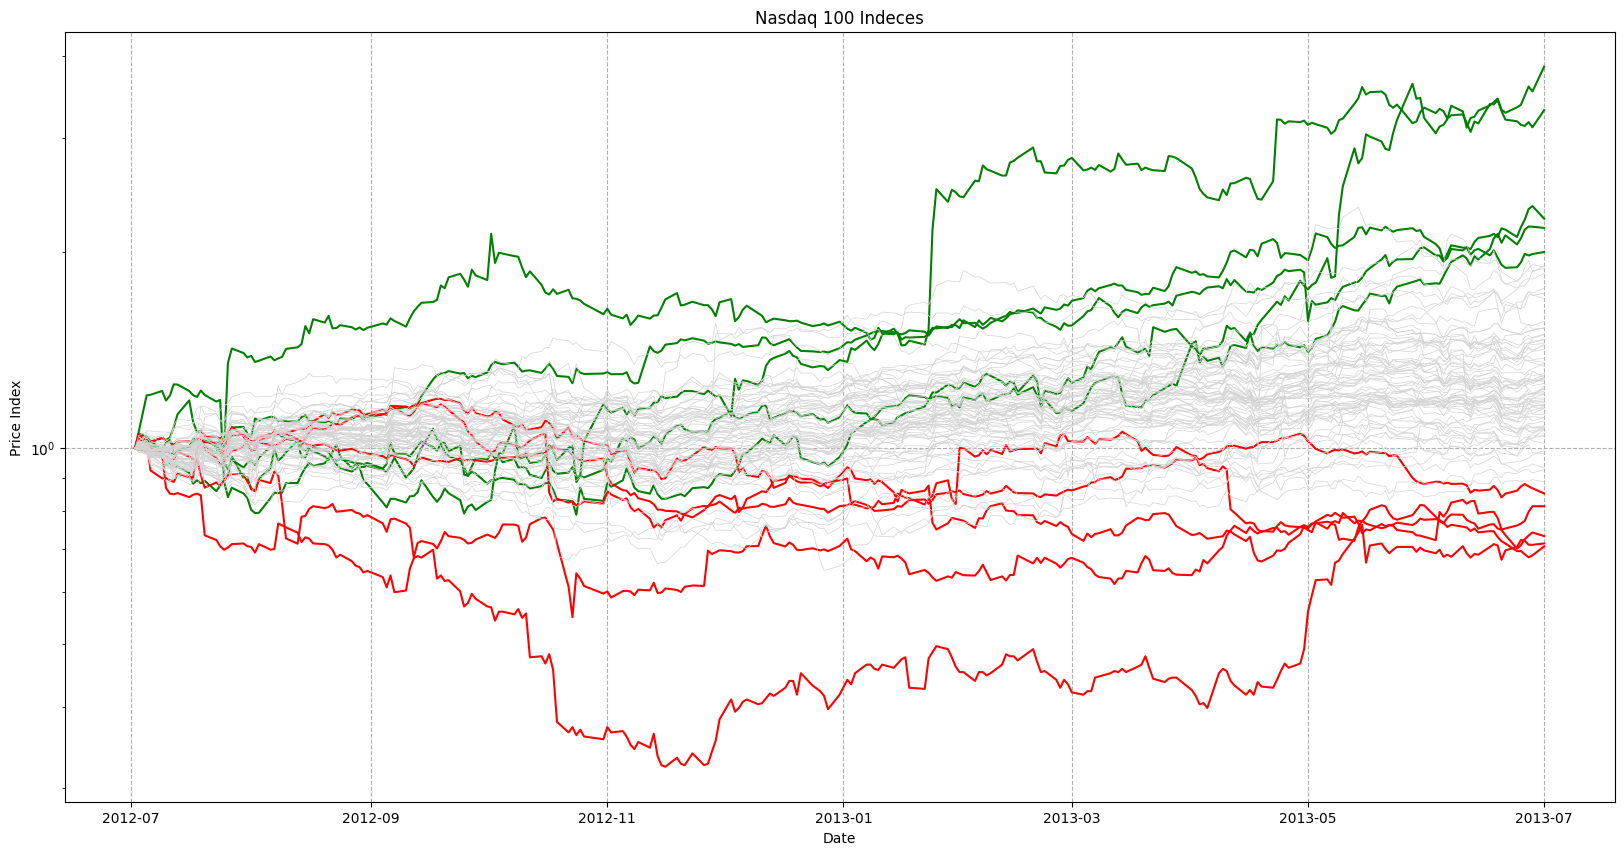

In [101]:
# plot the index for all tickers in the dataframe hPricesIDX
plt.figure(figsize=(20,10))
for ticker in top5:
    plt.plot(signalIndexDT[ticker], color='green')
for ticker in bottom5:
    plt.plot(signalIndexDT[ticker], color='red')
for ticker in otherTickers:
    plt.plot(signalIndexDT[ticker], color='lightgrey', linewidth='0.5')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.title('Nasdaq 100 Indeces')
# use a log scale for the y axis
plt.yscale('log')
# plot gridlines
plt.grid(which='major', axis='both', linestyle='--')
plt.show()

Let's set up a long portfolio with those green stocks above, equally weighted

In [109]:
opening_portfolio_value = 1000000

# create a list of the prices in hPricesDT for top5
top5Prices = []
#top5Prices = signalDT[signal_end_date][top5].tolist()
print(signalDT[signal_start_date][top5])

# set top5Weights to be the portfolio size divided by the prices in top5Prices
top5shareCount = []
top5shareCount = opening_portfolio_value / 5 / np.array(top5Prices)


#hPricesDT.iloc[signal_end_index][top5]
longPORTinput = {'Ticker': top5, 'Price': top5Prices, 'ShareCount': top5shareCount}
longPORT = pd.DataFrame(longPORTinput)
# set the index of longPORT to be the tickers
longPORT.set_index('Ticker', inplace=True)
longPORT


# add up all the prices for hPricesDT[top5].iloc[signal_end_index]
currentValue = longPORT['Price'] * longPORT['ShareCount']

longPORT

KeyError: Timestamp('2012-07-01 00:00:00')

And let's set up the short portfolio now

In [81]:
bottom5Prices = []
bottom5Prices = hPricesDT.iloc[signal_end_date][bottom5].tolist()
bottom5shareCount = []
bottom5shareCount = opening_portfolio_value / 5 / np.array(bottom5Prices)
shortPORTinput = {'Ticker': bottom5, 'Price': bottom5Prices, 'ShareCount': bottom5shareCount}
shortPORT = pd.DataFrame(shortPORTinput)
shortPORT.set_index('Ticker', inplace=True)
shortPORT

,Price,ShareCount
Ticker,,
AAPL,10.175552,19654.952652
AMD,6.990000,28612.304227
FTNT,5.458000,36643.457913
MNST,6.745833,29647.932638
EXC,19.068260,10488.633886


Now let's look at the performance of the two portfolios.   
Notice that we are not rebalancing here or updating the portfolios if the leaders and laggers change composition.

Maybe this is something you could try if you do a momentum based method for your assignment

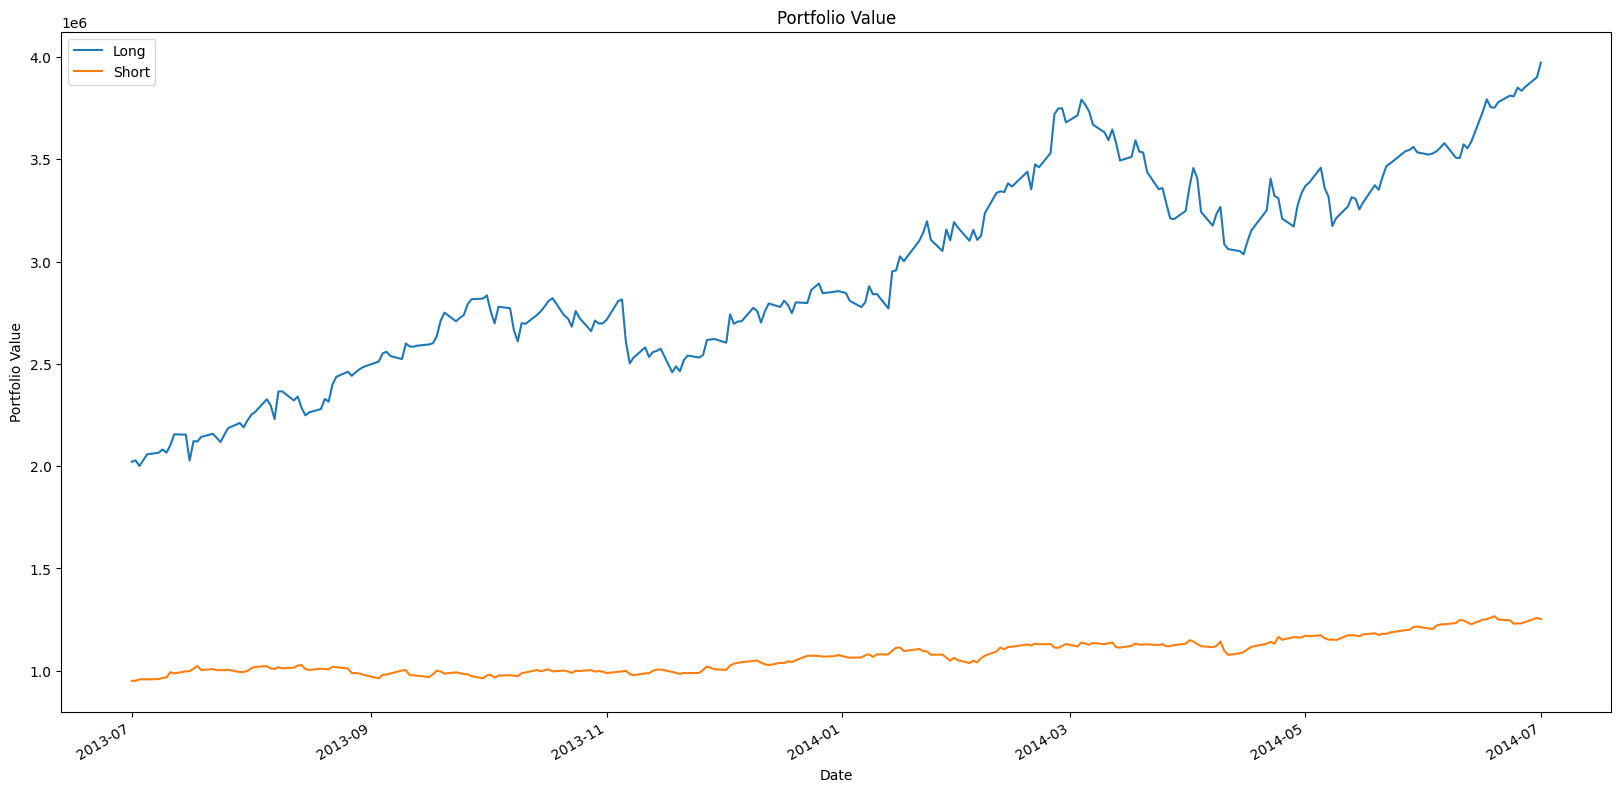

In [110]:
# define trading_start_date and tranding_end_date
trading_start_date = signal_end_date
# set trading_end_date to be 1 year after trading_start_date
trading_end_date = pd.to_datetime(trading_start_date) + pd.DateOffset(years=1)

# calculate portfolio values during the trading period
longPORT_values = hPricesDT[trading_start_date:trading_end_date][top5]*longPORT['ShareCount']
shortPORT_values = hPricesDT[trading_start_date:trading_end_date][bottom5]*shortPORT['ShareCount']

#chart the performance of the long and short portfolios
longPORT_values['Total'] = longPORT_values.sum(axis=1)
shortPORT_values['Total'] = shortPORT_values.sum(axis=1)
longPORT_values['Total'].plot(figsize=(20,10))
shortPORT_values['Total'].plot(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value')
plt.legend(['Long', 'Short'])
